<a href="https://colab.research.google.com/github/futureCodersSE/python-programming-for-data/blob/main/Worksheets/1_Data_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data retrieval
---

Examples of data being retrieved from a range of sources


## From a web page
---

The code below reads all the data tables from the Wikipedia page on Glasgow.  The 8th table on the page shows population data over a period of centuries.

The code reads the data from the page into a list of datatables.  The index [7] is used to access the 8th table in the list.  Change the index to see other data tables.  Use len(datatables) to find out how many tables are in the list.

In [1]:
import pandas as pd


def get_data():
  datatables = pd.read_html('https://en.wikipedia.org/wiki/Glasgow#Climate')
  df = datatables[7]  #Glasgow population data
  return df

# run and test the get_data() function, test visually - does it match the data on the web page
get_data().head(3)

,Historical population of Glasgow and city limits,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Historical population and city limits Year[77]...,NaN,NaN,NaN,NaN
1,Year[77],Population,Area (km2),Density (inhabitants/km2),Area changes
2,1300,1500,-[78],–,Initial


## From a local file
---

You can upload from a local file using the code below.  uploaded = file.upload() will open a file chooser and you can choose the data file from there.  After that, just use the file name to read from it.  

The file exists while the notebook is running, so should only be uploaded once.  If you need to access again, cancel the upload.

For this exercise you will need a copy of an Excel file.  To get a copy of this file "public_use-talent-migration.xlsx" go to this page: https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx and click on the Download button.  You will now have a copy in your Downloads folder.


In [8]:
import pandas as pd
# from google.colab import files
import io

def get_data():
  # upload a set of chosen files then read a specified file
  # uploaded = files.upload()
  # df = pd.read_excel(uploaded['public_use-talent-migration.xlsx'],sheet_name="Industry Migration")
  # return df
  return pd.read_excel(
    r'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true',
    sheet_name="Industry Migration", 
    engine='openpyxl'
    )



# run and test the get_data() function, test visually - does it match the data on the web page
get_data().head(3)

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,High income,Middle East & North Africa,C,Manufacturing,1,Defense & Space,378.74,127.94,8.20,68.51,49.55
1,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,3,Computer Hardware,100.97,358.14,112.98,149.57,182.22
2,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,4,Computer Software,1079.36,848.15,596.48,409.18,407.41


## From a csv file hosted on Github.com
---

The code below reads the data table stored in a Comma Separated Values file (this is a text file containing rows of data with each column within the row separated from the next column by a comma).  

If you were using Jupyter Notebooks on your device, the url could be replaced with the path to the CSV file.

In [10]:
import pandas as pd
url = "https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Paisley-Weather-Data.csv"
df = pd.read_csv(url)
df.head(3)

,yyyy,mm,tmax (degC),tmin (degC),af (days),rain (mm),sun (hours),status
0,1959,1,4,-2,25,40.9,54.1,NaN
1,1959,2,6.6,2.1,10,41.8,17.8,NaN
2,1959,3,10.6,4.2,0,50.9,85.7,NaN


## From an Excel file hosted on Github.com
---

The code below reads the data table from a sheet in an Excel file.  If you don't specify a sheet then it will assume that you want to read the data from the first sheet in the Excel workbook (sheet_name = 0).  If you don't know the sheet name but know it is the second sheet, you can use sheet_name = 1, or 2 for the third sheet, etc.

If you were using Jupyter Notebooks on your device, the url could be replace with the path to the Excel file.

In [12]:
import pandas as pd
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"
df = pd.read_excel(url, sheet_name="Industry Migration")
df.head(3)

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,High income,Middle East & North Africa,C,Manufacturing,1,Defense & Space,378.74,127.94,8.20,68.51,49.55
1,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,3,Computer Hardware,100.97,358.14,112.98,149.57,182.22
2,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,4,Computer Software,1079.36,848.15,596.48,409.18,407.41


## From an API which delivers the data in JSON format
---

The code below requests the data from the url.  This is a bit more tricky than the other ways to get the data as how you access the data will depend on how it is organised.

In this example, the data is returned as a dictionary, which will have the key 'data' against which the actual data is stored.  In the example, the data has been taken from the 'data' key/value pair and is stored in json_data. 

Again, in this example, the json_data is a list of json_objects but it only has one object in the list.  Try adding the line `print(json_data)` to see this.  

data_table is the first object in the json_data list.  Try adding the line `print(data_table)` to see this.

In this example, the data table object has three keys, 'to', 'from' and 'regions'.  The 'regions' value is the data we want to use in our dataframe, so we normalize this json data into a pandas dataframe (df), which you can see as the output.  

Each API is likely to deliver its data in a different format and so you will need to be happy to read the documentation and to inspect the data to see what keys and indexes you need to access.

For information on the format of the data, see https://carbon-intensity.github.io/api-definitions/#regional

In [15]:
import pandas as pd
import requests

url = "https://api.carbonintensity.org.uk/regional"
json_data = requests.get(url).json()['data']
data_table = json_data[0]
df = pd.json_normalize(data_table['regions'])
df.head(3)


,regionid,dnoregion,shortname,generationmix,intensity.forecast,intensity.index
0,1,Scottish Hydro Electric Power Distribution,North Scotland,"[{'fuel': 'biomass', 'perc': 0}, {'fuel': 'coa...",0,very low
1,2,SP Distribution,South Scotland,"[{'fuel': 'biomass', 'perc': 1.3}, {'fuel': 'c...",4,very low
2,3,Electricity North West,North West England,"[{'fuel': 'biomass', 'perc': 2}, {'fuel': 'coa...",36,very low


### Exercise - upload a file from your local drive

Visit the Kent and Medway Air Quality site: https://kentair.org.uk/

Collect a data file containing data on Ozone levels in Dover:

Open the site
Go to the Data page  
Launch the data selector tool  
Select:
*  Automatic monitoring data
*  Measurement data and simple statistics
*  Ozone
*  Daily mean
*  This month
*  Thurrock
*  Thurrock

Click on Download CSV

This should be downloaded into your Downloads folder.

NOW

Write a function that will allow you to upload the file and then read its contents into a dataframe.

To read an uploaded CSV file (which will be in bytes format) use:

```
df = pd.read_csv(io.BytesIO(uploaded['your filename']))
```


Display the dataframe and compare the contents with the output on the site you took the data from.





In [ ]:
import pandas as pd
from google.colab import files
import io

def get_data():
  # upload a set of chosen files then read a specified file
  !rm NO2-daily-mean-2014-2021-Swale-Newington.csv
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['NO2-daily-mean-2014-2021-Swale-Newington.csv']))
  return df

get_data()

# ACTIVITIES

RUN ALL THE CODE CELLS ABOVE TO SEE WHAT THEY DO AND WHAT DATA THEY GET FOR YOU.

Now have a go at opening a few data sets yourself.

### Exercise 1
---

*  Open the datasets list: [here](https://docs.google.com/document/d/1cijDOCDixsYu-Rr9pC8STPPXado3xoFpgBAZgdDTLHs/edit?usp=sharing)  

*  Find a dataset that is a CSV file, copy the code above (for online CSV) into the code cell below

*  Run the code to open the data.



In [17]:
pd.read_csv(r'https://raw.githubusercontent.com/futureCodersSE/working-with-data/main/Data%20sets/Paisley-Weather-Data.csv').head(3)

,yyyy,mm,tmax (degC),tmin (degC),af (days),rain (mm),sun (hours),status
0,1959,1,4,-2,25,40.9,54.1,NaN
1,1959,2,6.6,2.1,10,41.8,17.8,NaN
2,1959,3,10.6,4.2,0,50.9,85.7,NaN


### Exercise 2
---
Open the datasets list: [here](https://docs.google.com/document/d/1cijDOCDixsYu-Rr9pC8STPPXado3xoFpgBAZgdDTLHs/edit?usp=sharing)  

* Find a dataset that is an Excel file
* Copy the code above (for Excel files on Github) into the code cell below
* Change the line
```
df = pd.read_excel(url,sheet_name="Industry Migration") 
```
to 
```
df = pd.read_excel(url)
```
This will then open the first sheet in the Excel file, rather than a named sheet.

* Run the code to open the data.

In [21]:
url = r"https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true"

display(pd.read_excel(url, sheet_name="Industry Migration").head(3))
display(pd.read_excel(url).head(3))

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,High income,Middle East & North Africa,C,Manufacturing,1,Defense & Space,378.74,127.94,8.20,68.51,49.55
1,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,3,Computer Hardware,100.97,358.14,112.98,149.57,182.22
2,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,4,Computer Software,1079.36,848.15,596.48,409.18,407.41


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


### Exercise 3
---
*  Copy the code from the API delivered in JSON format
*  Change the URL to add /england to the end of it
*  Run the code to see the data for England only
*  Change it again to show data for Scotland, (/scotland)
*  Change it again to show data for Wales

In [53]:
import pandas as pd
import requests

def get_data_plot_pie(country='england'):
    url = f"https://api.carbonintensity.org.uk/regional/{country}"
    json_data = requests.get(url).json()
    df = pd.json_normalize(json_data['data'][0]['data'][0]['generationmix'])
    df.set_index('fuel').plot(kind='pie', y='perc')
    return df

,fuel,perc
0,biomass,4.3
1,coal,0.0
2,imports,9.6
3,gas,14.7
4,nuclear,19.9
5,other,0.0
6,hydro,0.9
7,solar,0.0
8,wind,50.7


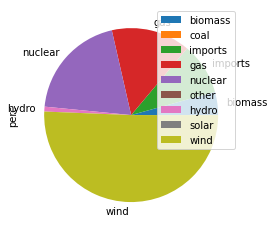

In [54]:
get_data_plot_pie('england')

,fuel,perc
0,biomass,0.7
1,coal,0.0
2,imports,3.4
3,gas,2.1
4,nuclear,15.4
5,other,0.0
6,hydro,5.9
7,solar,0.0
8,wind,72.6


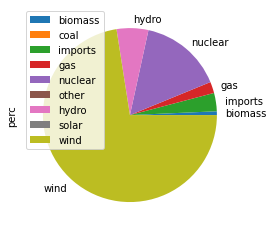

In [55]:
get_data_plot_pie('scotland')

,fuel,perc
0,biomass,0.2
1,coal,0.0
2,imports,10.3
3,gas,14.2
4,nuclear,4.8
5,other,0.0
6,hydro,2.2
7,solar,0.0
8,wind,68.3


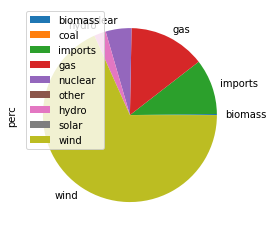

In [56]:
get_data_plot_pie('wales')